# KNN para classificação

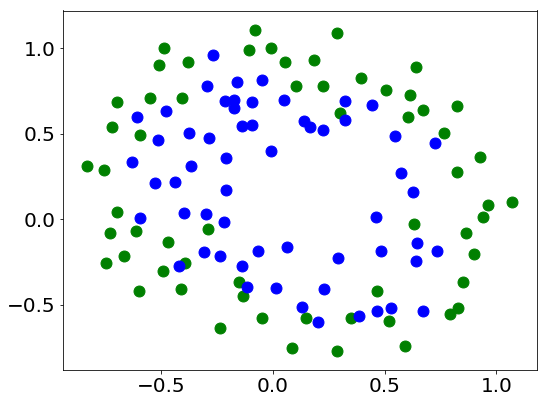

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings("ignore")
import knn as knn
import common as com

from sklearn import datasets

#x, y = datasets.load_iris(return_X_y=True)
#x = x[:,2:4]

#np.random.seed(12345)
#x, y = datasets.make_blobs(n_samples=60, centers=3, cluster_std=3)

#data_table = pd.read_csv('data/blobs2.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
# = data_table.iloc[:,data_table.columns[-1]].values

data_table = pd.read_csv('data/ex2data2.txt', header=None)
x = data_table.drop(data_table.columns[-1], axis=1).values
y = data_table.iloc[:,data_table.columns[-1]].values

#data_table = pd.read_csv('data/blobs.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values

labels = [0, 1, 2]
colors = ['green', 'blue', 'red']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
#plt.savefig('figs/blobs2.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

In [10]:
np.random.seed(12345)

number_train = int(np.ceil(0.7*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 84
Número de padrões de teste: 34


## Normalização dos dados

In [11]:
normalize_data = False

if normalize_data:
    x_mean = np.mean(x_train, axis=0)        
    x_train -= x_mean
    x_std = np.std(x_train, axis=0)
    x_train /= x_std
    
    x_test -= x_mean
    x_test /= x_std
    
    fig = plt.figure(figsize=com.figsize)
    plot_data(x_train, y_train)
    plot_data(x_test, y_test, marker='x')    
    plt.show()
    xlim = fig.gca().get_xlim() 
    ylim = fig.gca().get_ylim() 

## Solução via KNN

Taxa de erro no teste para k = 5 e distância 'euclidean': 29.41%
Taxa de erro no teste para k = 5 e distância 'manhattan': 32.35%
Taxa de erro no teste para k = 5 e distância 'mahalanobis': 32.35%


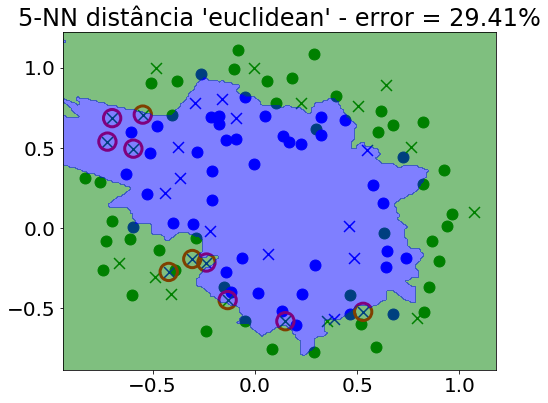

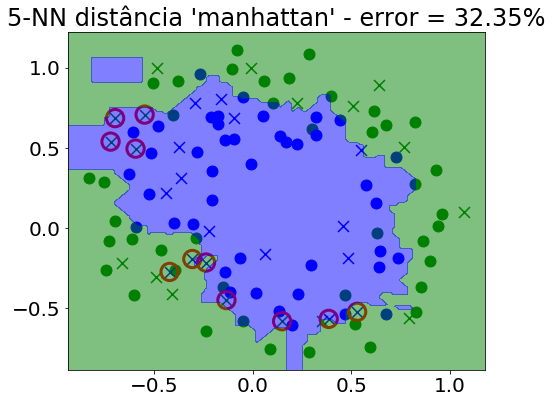

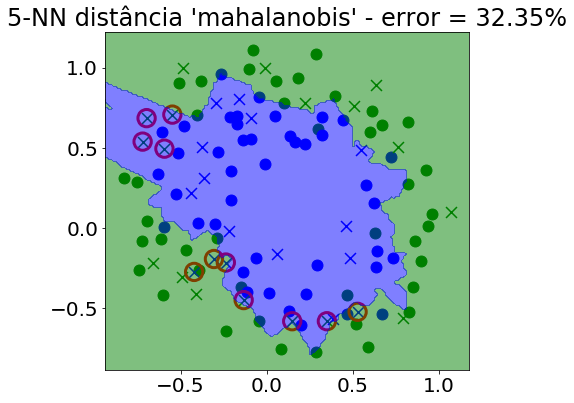

In [12]:
k = 5

distance_metric = ['euclidean', 'manhattan', 'mahalanobis']
plot_figures = True

for dist in distance_metric:

    wrong_index_test = y_test != knn.predict_class(x_train, y_train,
                                                   x_test, k=k, distance_metric=dist)
    
    if plot_figures:
        plt.rcParams.update({'font.size': com.fontsize})
        fig, ax = plt.subplots(figsize=com.figsize)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        plot_data(x_train, y_train)
        plot_data(x_test, y_test, marker='x', only_data=False, legend=False)  
        ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
        xx, yy = com.make_meshgrid(x[:,0], x[:,1])
        com.plot_contours(ax, None,
            lambda x_new, model:
                knn.predict_class(x_train, y_train, x_new, k=k, distance_metric=dist),
                          xx, yy, colors)

        plt.title("%d-NN distância '%s' - error = %.2f%%" % (k, dist, 100*np.mean(wrong_index_test)))
        plt.savefig('figs/blobs2_5NN_' + dist + '.png', dpi=com.dpi)

    print("Taxa de erro no teste para k = %d e distância '%s': %.2f%%" % (k, dist, 100*np.mean(wrong_index_test)))

## Grid search para otimização do K

In [5]:
number_validation = int(np.ceil(0.3*(x_train.shape[0])))
number_train = x_train.shape[0] - number_validation

random_index = np.random.permutation(x_train.shape[0])
train_index = random_index[:number_train+1]
validation_index = random_index[number_train+1:number_train+number_validation+1]

x_train, x_validation = x_train[train_index], x_train[validation_index]
y_train, y_validation = y_train[train_index], y_train[validation_index]

print("Conjunto de treinamento: %d amostras" % y_train.shape[0])
print("Conjunto de validação: %d amostras" % y_validation.shape[0])

Conjunto de treinamento: 60 amostras
Conjunto de validação: 25 amostras


K = 1, distance_metric = 'euclidean' -- Taxa de erro na validação: 4.00%
K = 3, distance_metric = 'euclidean' -- Taxa de erro na validação: 4.00%
K = 5, distance_metric = 'euclidean' -- Taxa de erro na validação: 4.00%
K = 7, distance_metric = 'euclidean' -- Taxa de erro na validação: 4.00%
K = 9, distance_metric = 'euclidean' -- Taxa de erro na validação: 8.00%
K = 11, distance_metric = 'euclidean' -- Taxa de erro na validação: 8.00%
K = 13, distance_metric = 'euclidean' -- Taxa de erro na validação: 8.00%
K = 15, distance_metric = 'euclidean' -- Taxa de erro na validação: 12.00%
K = 17, distance_metric = 'euclidean' -- Taxa de erro na validação: 12.00%
K = 19, distance_metric = 'euclidean' -- Taxa de erro na validação: 12.00%
K = 21, distance_metric = 'euclidean' -- Taxa de erro na validação: 12.00%
K = 23, distance_metric = 'euclidean' -- Taxa de erro na validação: 16.00%
K = 25, distance_metric = 'euclidean' -- Taxa de erro na validação: 16.00%
K = 1, distance_metric = 'manhattan' 

Text(0.5, 1.0, "9-NN distância 'mahalanobis' - error = 5.71%")

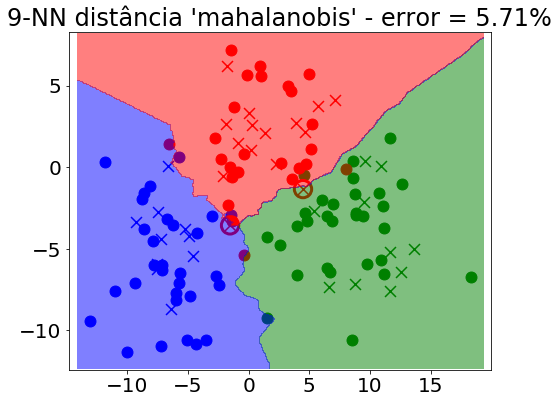

In [6]:
grid_search = np.meshgrid(np.arange(1, 26, 2), # k
                          ['euclidean', 'manhattan', 'mahalanobis']) # distance metric
validation_list = []
validation_list_index = []

for i in range(grid_search[0].shape[0]):
    for j in range(grid_search[1].shape[1]):
        k = grid_search[0][i,j]
        distance_metric = grid_search[1][i,j]   
        wrong_index_validation = y_validation != knn.predict_class(x_train, y_train, x_validation,
                                                                   k=k, distance_metric=distance_metric)
        validation_list.append(np.mean(wrong_index_validation))
        validation_list_index.append((i,j))
        print("K = %d, distance_metric = '%s' -- Taxa de erro na validação: %.2f%%" % (k, distance_metric, 100*validation_list[-1]))
    
best_i, best_j = validation_list_index[np.argmin(validation_list)]   
best_k = grid_search[0][best_i, best_j]
best_distance_metric = grid_search[1][best_i, best_j]
print("Melhor K: %d" % best_k)
print("Melhor métrica de distância: '%s'" % best_distance_metric)
print("Taxa de erro na validação: %.2f%%" % (100*validation_list[best_i]))
    
in_train_validation = np.vstack((x_train, x_validation))
out_train_validation = np.concatenate((y_train, y_validation))    

wrong_index_test = y_test != knn.predict_class(in_train_validation, out_train_validation, x_test,
                                               k=best_k, distance_metric=best_distance_metric)

print("Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test)))

plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(in_train_validation, out_train_validation)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, None, lambda x_new, model: np.array(knn.predict_class(in_train_validation, out_train_validation,
                                                                            x_new, k=best_k, distance_metric=best_distance_metric)), xx, yy, colors)    
plt.title("%d-NN distância '%s' - error = %.2f%%" % (best_k, best_distance_metric, 100*np.mean(wrong_index_test)))
#plt.savefig('figs/blobs_best_KNN.png', dpi=com.dpi)

Taxa de erro no teste para k = 1: 2.86%


Text(0.5, 1.0, '1-NN - error = 2.86%')

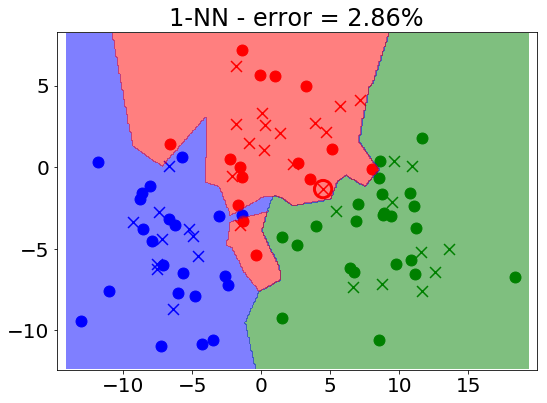

In [7]:
k = 1

wrong_index_test = y_test != knn.predict_class(in_train_validation, out_train_validation,
                                               x_test, k=k)

print("Taxa de erro no teste para k = %d: %.2f%%" % (k, 100*np.mean(wrong_index_test)))

plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)  
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, None, lambda x_new, model: np.array(knn.predict_class(x_train, y_train, x_new, k=k)), xx, yy, colors)

plt.title("%d-NN - error = %.2f%%" % (k, 100*np.mean(wrong_index_test)))
#plt.savefig('figs/blobs_1NN.png', dpi=com.dpi)

Taxa de erro no teste para k = 25: 5.71%


Text(0.5, 1.0, '25-NN - error = 5.71%')

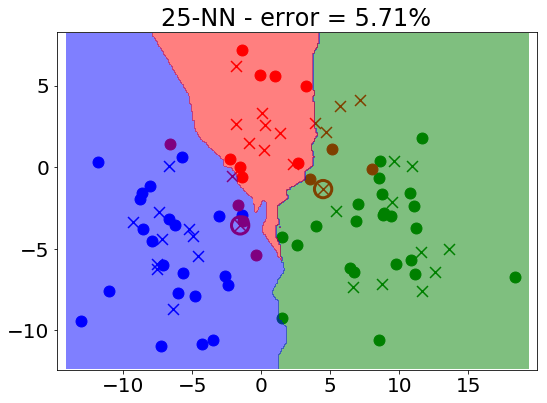

In [8]:
k = 25

wrong_index_test = y_test != knn.predict_class(in_train_validation, out_train_validation,
                                               x_test, k=k)

print("Taxa de erro no teste para k = %d: %.2f%%" % (k, 100*np.mean(wrong_index_test)))

plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)  
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, None, lambda x_new, model: np.array(knn.predict_class(x_train, y_train, x_new, k=k)), xx, yy, colors)

plt.title("%d-NN - error = %.2f%%" % (k, 100*np.mean(wrong_index_test)))
#plt.savefig('figs/blobs_25NN.png', dpi=com.dpi)